# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Derek Graves

### GitHub Repo: https://github.com/dgraves4/article-summarizer

### Article: https://www.washingtonpost.com/opinions/2024/04/12/children-social-media-anxiety-torment/

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [89]:
# Web scraping
from bs4 import BeautifulSoup
import requests
import pickle

# Natural Language Processing
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob

# Data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Utility for counting objects
from collections import Counter

# Load spaCy language model
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')  # Adding TextBlob integration to spaCy pipeline


!pip list
print('All  installs valid.')


Package            Version
------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
bs4                0.0.2
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.7
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy 

#### Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

#### Question 1 Response:

In [90]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the article
url = "https://www.washingtonpost.com/opinions/2024/04/12/children-social-media-anxiety-torment/"

# Fetch the web page
response = requests.get(url)
response.raise_for_status()  # Ensures that the request was successful

# Use BeautifulSoup to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the specific div that contains the article text
# It is crucial to adjust the class name or id based on your exact needs
article_div = soup.find_all('div', class_='wpds-c-PJLV article-body')

# Serialize the HTML content of the article div to a .pkl file
with open('article_content_html.pkl', 'wb') as file:
    pickle.dump(str(article_div), file)

print("The HTML content of the article has been saved to 'article_content_html.pkl'")





The HTML content of the article has been saved to 'article_content_html.pkl'


In [91]:
# Print article text
from bs4 import BeautifulSoup

# Load the HTML content from the saved pickle file
with open('article_content_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Print the text of the article
print(article_text)


[Each generation seems to come with its own cultural craving. For boomers, it was television. The next generation became absorbed with video everything — movies and games, the addictive powers of which couldn’t have been imagined based on early iterations. Pac-Man (remember him?), created in Japan in 1980, was designed as an antidote to violent arcade games., , I wrote then about watching my little boy playing a game, wild with nervous energy and jerking spasmodically. I worried about what was happening to his brain. This is a kid who, when he was 10 and I suggested he run outside and play, said, “Mom, there’s something you need to know about me. My idea of being outside is standing outside Blockbuster Video.”, Today’s craving, of course, is the smartphone and its free pass into the universe of social media. For tykes and teenagers now, social media is a mix of innocent fun and cruel torment., Cravings, of course, often lead to addiction. Today, phone addiction and social media have le

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [92]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the saved pickle file
with open('article_content_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Setup spaCy and SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Process the text with spaCy
doc = nlp(article_text)
sentiment_polarity = doc._.blob.sentiment.polarity  # Correct attribute access

# Count the number of sentences
number_of_sentences = len(list(doc.sents))

# Output results
print(f"Sentiment Polarity: {sentiment_polarity}")
print(f"Number of Sentences: {number_of_sentences}")






Sentiment Polarity: 0.07880836106042718
Number of Sentences: 55


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [93]:
import spacy
from collections import Counter
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the saved pickle file
with open('article_content_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(article_text)

# Get lowercased tokens excluding stop words and punctuation
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

# Calculate token frequencies
token_freq = Counter(tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Print the most common tokens and their frequencies
print("5 Most Frequent Tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

# Print all tokens with frequencies
print("All Tokens with Frequencies:")
for token, frequency in token_freq.items():
    print(f"{token}: {frequency}")



5 Most Frequent Tokens:
children: 10
social: 9
haidt: 9
media: 7
play: 6
All Tokens with Frequencies:
generation: 4
come: 1
cultural: 1
craving: 2
boomers: 2
television: 2
absorbed: 1
video: 2
movies: 1
games: 3
addictive: 1
powers: 1
imagined: 1
based: 1
early: 1
iterations: 1
pac: 1
man: 1
remember: 1
created: 1
japan: 1
1980: 1
designed: 1
antidote: 1
violent: 1
arcade: 1
wrote: 1
watching: 1
little: 1
boy: 1
playing: 2
game: 1
wild: 1
nervous: 1
energy: 1
jerking: 1
spasmodically: 1
worried: 1
happening: 2
brain: 2
kid: 1
10: 3
suggested: 1
run: 1
outside: 3
play: 6
said: 3
mom: 2
need: 1
know: 2
idea: 1
standing: 1
blockbuster: 1
today: 3
course: 4
smartphone: 3
free: 2
pass: 1
universe: 2
social: 9
media: 7
tykes: 1
teenagers: 4
mix: 1
innocent: 1
fun: 2
cruel: 1
torment: 1
cravings: 1
lead: 1
addiction: 2
phone: 6
led: 1
global: 1
crisis: 1
youth: 2
mental: 5
health: 3
according: 1
psychologist: 1
jonathan: 1
haidt: 9
new: 3
book: 1
anxious: 3
great: 4
rewiring: 1
childhood: 4
c

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [94]:
import spacy
from collections import Counter
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the saved pickle file
with open('article_content_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Load the spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Process the article text with spaCy
doc = nlp(article_text)

# Extract lemmas and count their frequencies, filtering out HTML tags
lemmas = Counter(token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha and not token.like_num)

# Get the 5 most frequent lemmas
common_lemmas = lemmas.most_common(5)

# Print the common lemmas with frequencies
print("Most frequent lemmas:")
for lemma, frequency in common_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas with frequencies
print("\nAll lemmas with frequencies:")
for lemma, frequency in lemmas.items():
    print(f"{lemma}: {frequency}")



Most frequent lemmas:
child: 13
social: 9
haidt: 9
play: 8
phone: 8

All lemmas with frequencies:
generation: 4
come: 2
cultural: 1
craving: 2
boomer: 2
television: 2
absorb: 1
video: 2
movie: 1
game: 4
addictive: 1
power: 1
imagine: 1
base: 1
early: 1
iteration: 1
pac: 1
man: 1
remember: 1
create: 1
japan: 1
design: 1
antidote: 1
violent: 1
arcade: 1
write: 1
watch: 4
little: 1
boy: 2
play: 8
wild: 1
nervous: 1
energy: 1
jerk: 1
spasmodically: 1
worry: 1
happen: 2
brain: 3
kid: 1
suggest: 1
run: 1
outside: 3
say: 6
mom: 2
need: 1
know: 2
idea: 1
stand: 1
blockbuster: 1
today: 3
course: 4
smartphone: 4
free: 2
pass: 1
universe: 2
social: 9
medium: 7
tyke: 1
teenager: 4
mix: 1
innocent: 1
fun: 2
cruel: 1
torment: 1
cravings: 1
lead: 3
addiction: 2
phone: 8
global: 1
crisis: 1
youth: 2
mental: 5
health: 3
accord: 1
psychologist: 1
jonathan: 1
haidt: 9
new: 3
book: 1
anxious: 3
great: 4
rewiring: 1
childhood: 4
cause: 2
epidemic: 1
illness: 2
cite: 1
evidence: 1
startling: 1
rise: 3
depre

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

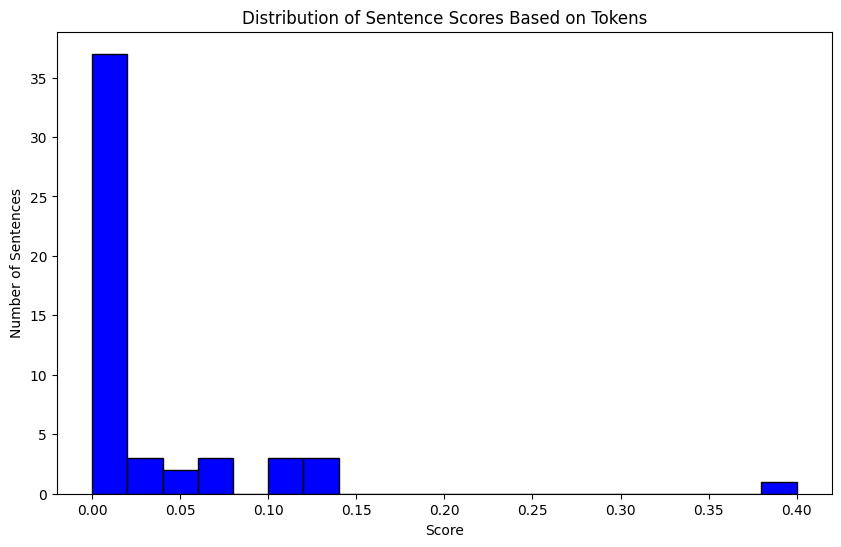

In [106]:
import spacy
import pickle
import matplotlib.pyplot as plt

# Load the trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Define the scoring function for tokens
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
    matches = sum(token in interesting_tokens for token in tokens)
    return matches / len(tokens) if tokens else 0

# Load the article text from the .pkl file
with open('article_content_html.pkl', 'rb') as file:
    article_text = pickle.load(file)

# Process the loaded article text with spaCy
doc = nlp(article_text)

# Assuming these lists are based on your provided frequent tokens
interesting_tokens = ["children", "social", "haidt", "media", "play"]

# Calculate scores for every sentence
sentence_scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in doc.sents]

# Plot the histogram of sentence scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Sentence Scores Based on Tokens')
plt.xlabel('Score')
plt.ylabel('Number of Sentences')
plt.show()

# The most common range of scores seems to be between 0.05 and 0.1, with a few outlier sentences having scores above 0.2.
# This indicates that most sentences contain a small number of interesting tokens, with a few sentences containing more of these tokens.
# The distribution is skewed to the right, with a long tail of sentences having higher scores.


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?